In [181]:
# %matplotlib inline
import pandas as pd #Pandas para usar dataframes
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico

In [182]:
dataset = pd.read_csv("Dataset_parcialito.csv") 

INSPECCIONAR EL DATAFRAME Y CARACTERIZARLO

In [183]:
dataset.describe

<bound method NDFrame.describe of        ID   Nombre     Apellido                       Mail   Ingreso  \
0       1     Dena       Bruins     dbruins0@instagram.com  10962.03   
1       2   Gisele       Fliege          gfliege1@xing.com    996.87   
2       3    Emili  Brimmicombe    ebrimmicombe2@tmall.com   2339.14   
3       4  Bryanty         Oman           boman3@wired.com   8356.70   
4       5    Diane    Adamovitz       dadamovitz4@digg.com   6676.88   
..    ...      ...          ...                        ...       ...   
995   996    Adore       Kearle   akearlern@mayoclinic.com   6916.30   
996   997  Sibella      Lendrem  slendremro@soundcloud.com  11300.85   
997   998    Morna      Arrault    marraultrp@netscape.com   2089.96   
998   999    Clyve      Pilling    cpillingrq@marriott.com  10311.18   
999  1000    Luigi       Burras         lburrasrr@yale.edu     97.19   

     Compras mensuales un pago  Compras mensuales cuotas  Pagos crédito  \
0                      216

In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   Nombre                         1000 non-null   object 
 2   Apellido                       1000 non-null   object 
 3   Mail                           1000 non-null   object 
 4   Ingreso                        968 non-null    float64
 5   Compras mensuales un pago      948 non-null    float64
 6   Compras mensuales cuotas       921 non-null    float64
 7   Pagos crédito                  943 non-null    float64
 8   Ahorro                         948 non-null    float64
 9   Frecuencia de compras un pago  941 non-null    float64
 10  Frecuencia de compras cuotas   943 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


In [185]:
columnas = list(dataset.columns)

In [186]:
col_que_queremos = columnas[4:]

Son las columnas con datos numericos que vamos a ver si estan distribuidas normalmente o no.

In [187]:
col_que_queremos

['Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

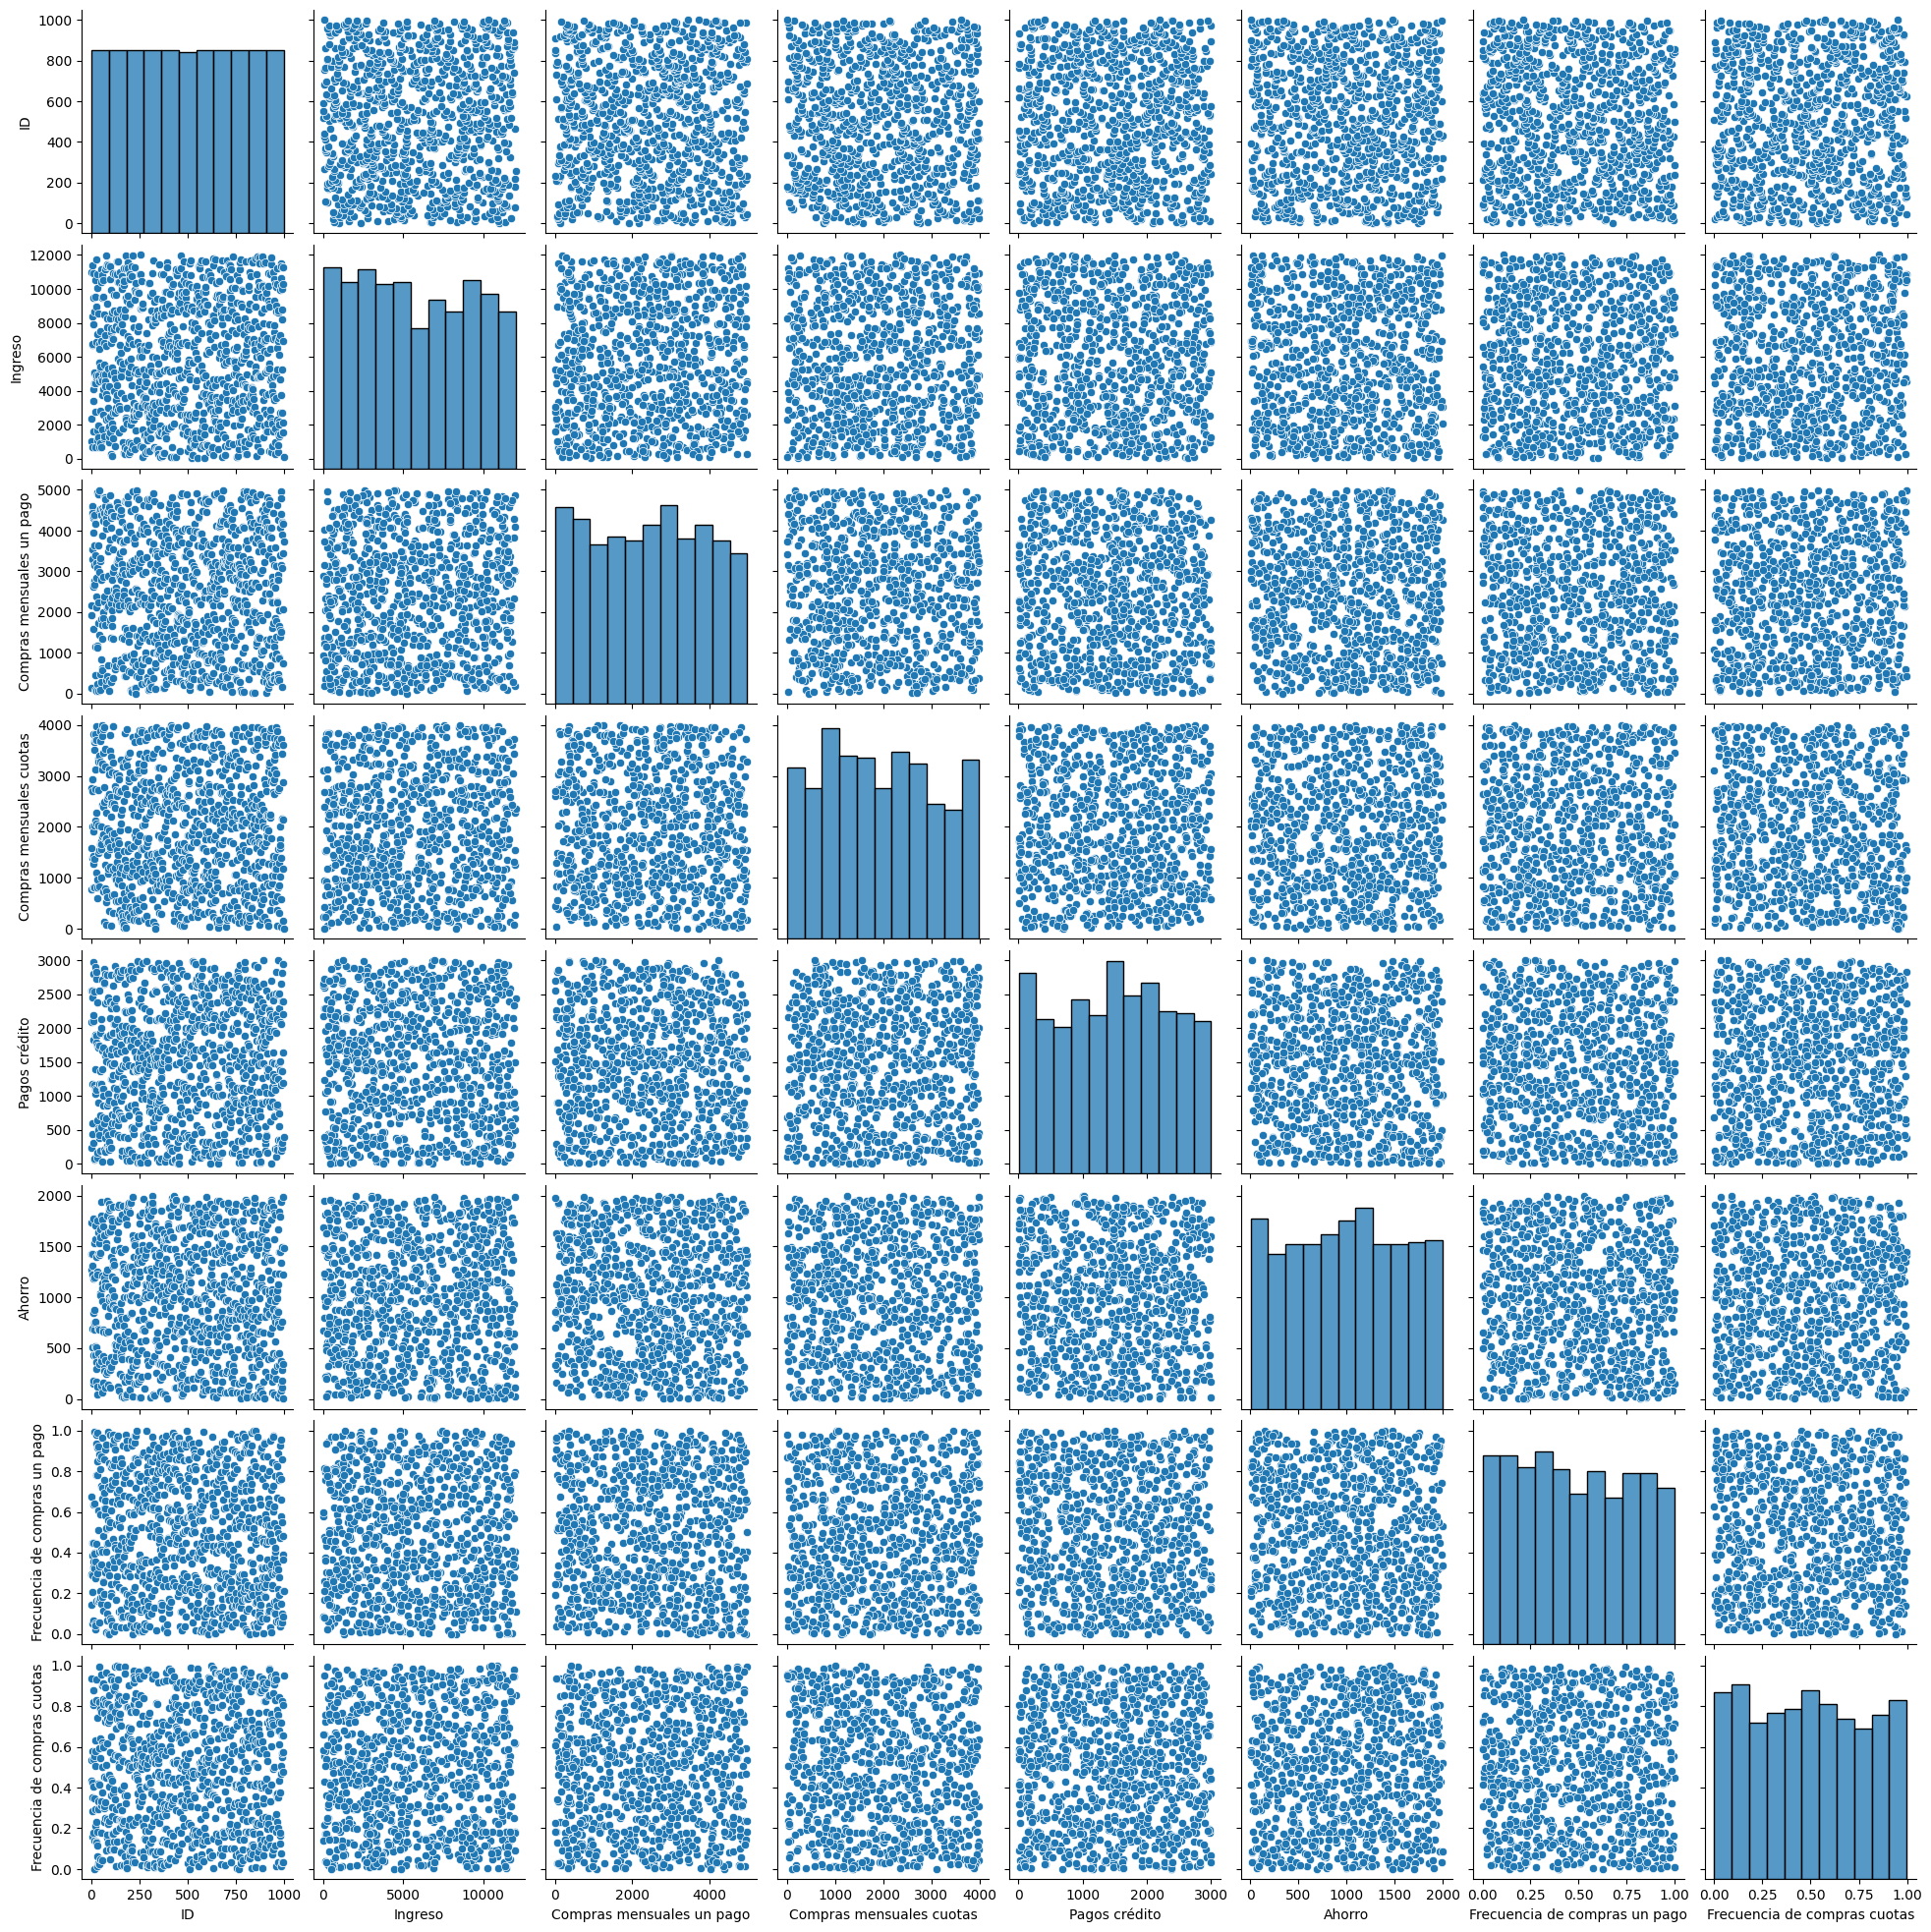

In [188]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='Ingreso', ylabel='Count'>

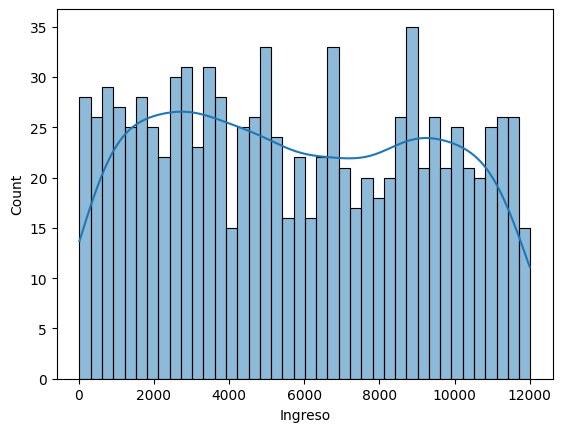

In [189]:
sns.histplot(data= dataset , x = "Ingreso",binwidth=300, kde=True )

In [190]:
from scipy import stats

In [191]:
w, p = stats.shapiro(dataset["Ingreso"])

In [192]:
p

1.0

# si p > 0,05 --> DISTRIBUCION NORMAL

Tenemos que fijarnos en todas las columnas numericas si son normales o no. para ello:

Tenemos que fijarnos las anomalias

In [193]:
len(dataset["Ingreso"])

1000

In [194]:
# DUPLICADOS:
dataset.drop_duplicates(inplace=True)
# Elimino datos duplicados
# Con el inplace=True hago que se modifique el df original 
# (ya que si no lo aclaro no se modifica porque los df tienen datos inmutables)

In [195]:
len(dataset["Ingreso"])

1000

Ahi vimos la diferencia entre los dos len. Antes de sacar los duplicados y despues, esa diferencia son los datos duplicados.

 DATOS NULOS

<AxesSubplot:>

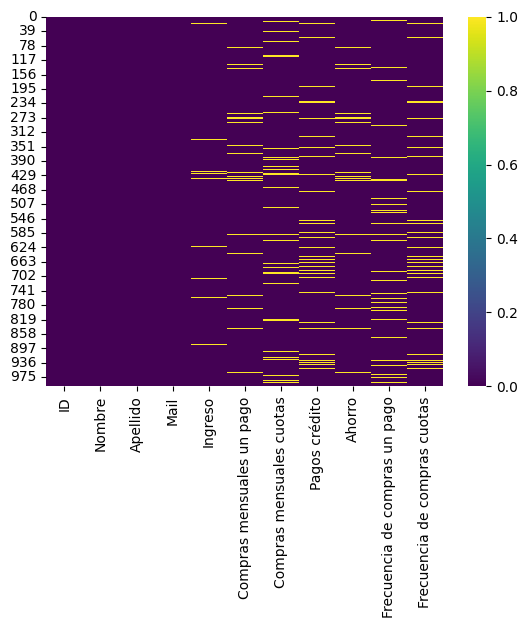

In [196]:
sns.heatmap(dataset.isnull(), cmap='viridis')

Tenemos datos nulos ya que en el grafico aparecen en amarillo. 


In [197]:
dataset = dataset.dropna()
#asi eliminamos los datos nan.

In [198]:
cuantil_inferior =dataset["Ingreso"].quantile(0.05)

In [199]:
cuantil_superior = dataset["Ingreso"].quantile(0.95)

In [200]:
datos = dataset[(dataset["Ingreso"] >= cuantil_inferior) & (dataset["Ingreso"]<= cuantil_superior)]

                        Para eliminar outlayers
cuantil_inferior =dataset["Ingreso"].quantile(0.05)
cuantil_superior = dataset["Ingreso"].quantile(0.95)
datos = dataset[(dataset["Ingreso"] >= cuantil_inferior) & (dataset["Ingreso"]<= cuantil_superior)]

In [201]:
# Elimino las columnas no numericas para poder normalizar la tabla.
dataset_limpio = pd.read_csv("dataset_parcialito.csv" ,index_col=0)
dataset_limpio.head()

,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
ID,,,,,,,,,,
1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847


UNA VEZ LIMPIADO EL DATA FRAME QUEDA NORMALIZARLO

In [202]:
# Con estas tres lineas se normalizan los datos:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_normalizado = scaler.fit_transform(dataset_limpio)
dataset_normalizado

ValueError: could not convert string to float: 'Dena'

Grafico de codos

In [ ]:
inercias = {}
def inercias_por_k (diccionario):
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init="random",n_init=10,max_iter=300,random_state=123457)
        kmeans.fit(dataset_escalado)
        diccionario[i]= kmeans.inertia


In [ ]:
print (kmeans.inertia_)
